#Kaggle dataset download

In [1]:
from google.colab import files
files.upload() #uploading api

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"apoorvb","key":"ea102443c4fe13d54fd20e037c3e8b02"}'}

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c acea-water-prediction

  0% 0.00/75.2k [00:00<?, ?B/s]
100% 75.2k/75.2k [00:00<00:00, 28.2MB/s]
  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 84.7MB/s]
  0% 0.00/431k [00:00<?, ?B/s]
100% 431k/431k [00:00<00:00, 60.3MB/s]
  0% 0.00/100k [00:00<?, ?B/s]
100% 100k/100k [00:00<00:00, 112MB/s]
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 63.4MB/s]
  0% 0.00/364k [00:00<?, ?B/s]
100% 364k/364k [00:00<00:00, 119MB/s]
  0% 0.00/256k [00:00<?, ?B/s]
100% 256k/256k [00:00<00:00, 81.8MB/s]
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 125MB/s]
  0% 0.00/37.8k [00:00<?, ?B/s]
100% 37.8k/37.8k [00:00<00:00, 34.2MB/s]
  0% 0.00/457k [00:00<?, ?B/s]
100% 457k/457k [00:00<00:00, 142MB/s]
  0% 0.00/8.76k [00:00<?, ?B/s]
100% 8.76k/8.76k [00:00<00:00, 7.86MB/s]


In [4]:
mv * /content/

mv: 'Aquifer_Auser.csv' and '/content/Aquifer_Auser.csv' are the same file
mv: 'Aquifer_Doganella.csv' and '/content/Aquifer_Doganella.csv' are the same file
mv: 'Aquifer_Luco.csv' and '/content/Aquifer_Luco.csv' are the same file
mv: 'Aquifer_Petrignano.csv' and '/content/Aquifer_Petrignano.csv' are the same file
mv: 'datasets_description.ods' and '/content/datasets_description.ods' are the same file
mv: 'datasets_description.xlsx' and '/content/datasets_description.xlsx' are the same file
mv: 'drive' and '/content/drive' are the same file
mv: 'kaggle.json' and '/content/kaggle.json' are the same file
mv: 'Lake_Bilancino.csv' and '/content/Lake_Bilancino.csv' are the same file
mv: 'River_Arno.csv' and '/content/River_Arno.csv' are the same file
mv: 'sample_data' and '/content/sample_data' are the same file
mv: 'Water_Spring_Amiata.csv' and '/content/Water_Spring_Amiata.csv' are the same file
mv: 'Water_Spring_Lupa.csv' and '/content/Water_Spring_Lupa.csv' are the same file
mv: 'Water_

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
!pip install odfpy 
from statsmodels.tsa.stattools import adfuller

     |████████████████████████████████| 727kB 8.8MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=d93f9b4399aa80744800f6afa94e1fe6136f412402bd31172e510c0d2339bbf7
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [179]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

#Acnea Water Prediction
Data exploration

In [ ]:
ls

Aquifer_Auser.csv          kaggle.json
Aquifer_Doganella.csv      Lake_Bilancino.csv
Aquifer_Luco.csv           River_Arno.csv
Aquifer_Petrignano.csv     sample_data/
datasets_description.ods   Water_Spring_Amiata.csv
datasets_description.xlsx  Water_Spring_Lupa.csv
drive/                     Water_Spring_Madonna_di_Canneto.csv


In [ ]:
info = pd.read_excel('datasets_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[5])
info.keys()
info['Datasets_Feature_Description'][47:52]

Database                                              River_Arno
Description    Information about Arno river. The Arno is the ...
Output                                 Hydrometry_Nave_di_Rosano
Name: 5, dtype: object


,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
47,ARNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
49,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
50,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero..."
51,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Firenze


In [ ]:
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][48])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][49])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][50])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][51])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][52])

Description
Uniquely identifies a day (Primary Key)
It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the river level, expressed in meters (m), detected by the hydrometric station Z


In [ ]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [ ]:
df = river
df.fillna(0,inplace=True)
df.columns

Index(['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano'],
      dtype='object')

In [ ]:
print(df.shape)
df.head()

(8217, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
1,02/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94
2,03/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.11
3,04/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84
4,05/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.88


In [ ]:
#getting number of rows and date of first datapoint with non-0 data for every column
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    query = df.query(i+'!= 0')
    print(i, query.shape[0], query.iloc[0].loc['Date'])

Rainfall_Le_Croci 2247 09/01/2004
Rainfall_Cavallina 1902 09/01/2004
Rainfall_S_Agata 2271 01/01/2004
Rainfall_Mangona 2204 08/01/2004
Rainfall_S_Piero 2347 05/01/2004
Rainfall_Vernio 1617 08/01/2004
Rainfall_Stia 478 03/01/2004
Rainfall_Consuma 549 07/01/2004
Rainfall_Incisa 1699 07/01/2004
Rainfall_Montevarchi 565 01/01/2004
Rainfall_S_Savino 520 02/01/2004
Rainfall_Laterina 441 08/01/2004
Rainfall_Bibbiena 876 03/01/2004
Rainfall_Camaldoli 540 09/01/2004


In [ ]:
#using subset of df from date : 01/01/2004 
data = df.iloc[df.loc[df['Date']=='01/01/2004'].index[0]:]
print(data.shape)
data.head()

(6026, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [ ]:
data['total_rain'] = data.iloc[:,1:15].sum(axis=1)
data.rename(columns = {'Temperature_Firenze':'temperature'}, inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2


In [ ]:
combined = data.iloc[:,[0,-3,-2,-1]].copy()
combined.head()

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,8.65,1.84,0.6
2192,02/01/2004,7.10,1.93,0.2
2193,03/01/2004,5.50,1.61,0.4
2194,04/01/2004,3.55,1.35,0.0
2195,05/01/2004,2.70,1.44,0.2


observing feature variation wrt to each other

In [ ]:
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    print('{} corrrelation with Hydrometry = {}'.format(i, data[i].corr(data['Hydrometry_Nave_di_Rosano'])))

Rainfall_Le_Croci corrrelation with Hydrometry = 0.23966280087212544
Rainfall_Cavallina corrrelation with Hydrometry = 0.2163401744591761
Rainfall_S_Agata corrrelation with Hydrometry = 0.21853142275185197
Rainfall_Mangona corrrelation with Hydrometry = 0.22565950069402
Rainfall_S_Piero corrrelation with Hydrometry = 0.2150349165426303
Rainfall_Vernio corrrelation with Hydrometry = 0.19813255142780523
Rainfall_Stia corrrelation with Hydrometry = 0.18069393331780031
Rainfall_Consuma corrrelation with Hydrometry = 0.18398213090325108
Rainfall_Incisa corrrelation with Hydrometry = 0.3089795868775006
Rainfall_Montevarchi corrrelation with Hydrometry = 0.16051391349526598
Rainfall_S_Savino corrrelation with Hydrometry = 0.18972897685057796
Rainfall_Laterina corrrelation with Hydrometry = 0.17062437154321144
Rainfall_Bibbiena corrrelation with Hydrometry = 0.22027431362329353
Rainfall_Camaldoli corrrelation with Hydrometry = 0.17728871235567017


Text(0.5, 1.0, 'Correlation among the variables')

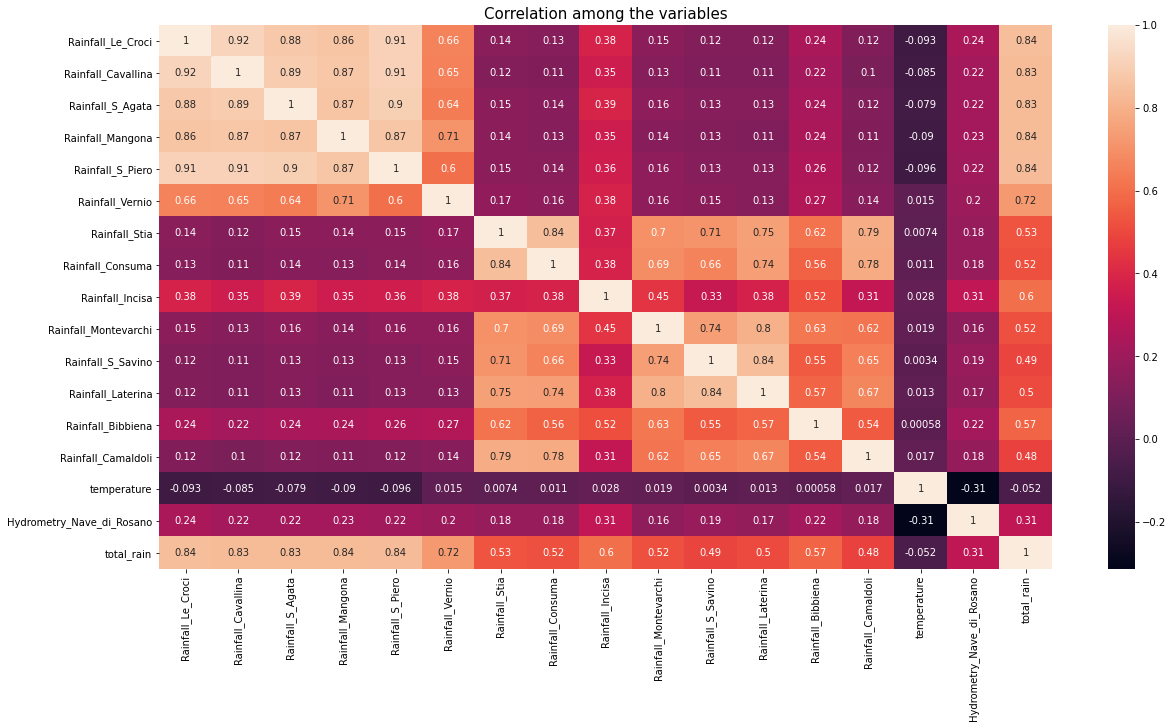

In [ ]:
correlation = data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

Text(0.5, 1.0, 'Correlation among all the variables of river data')

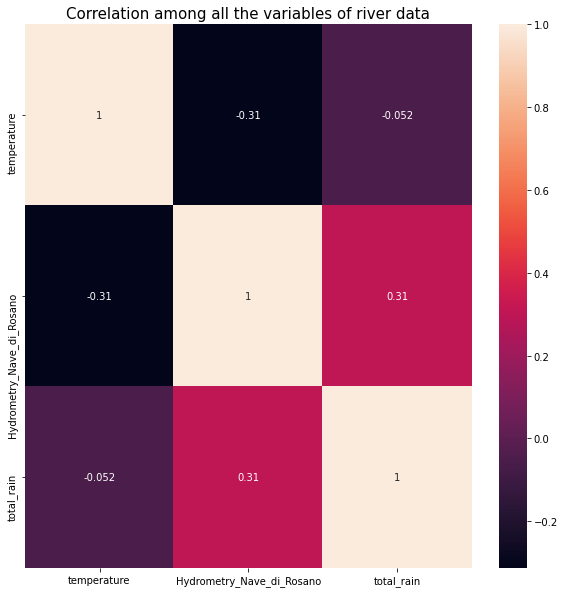

In [ ]:
correlation = combined.corr()
plt.figure(figsize=(10,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among all the variables of river data", size=15)

In [ ]:
com = combined.iloc[:,1:]
com.head()

,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,8.65,1.84,0.6
2192,7.10,1.93,0.2
2193,5.50,1.61,0.4
2194,3.55,1.35,0.0
2195,2.70,1.44,0.2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

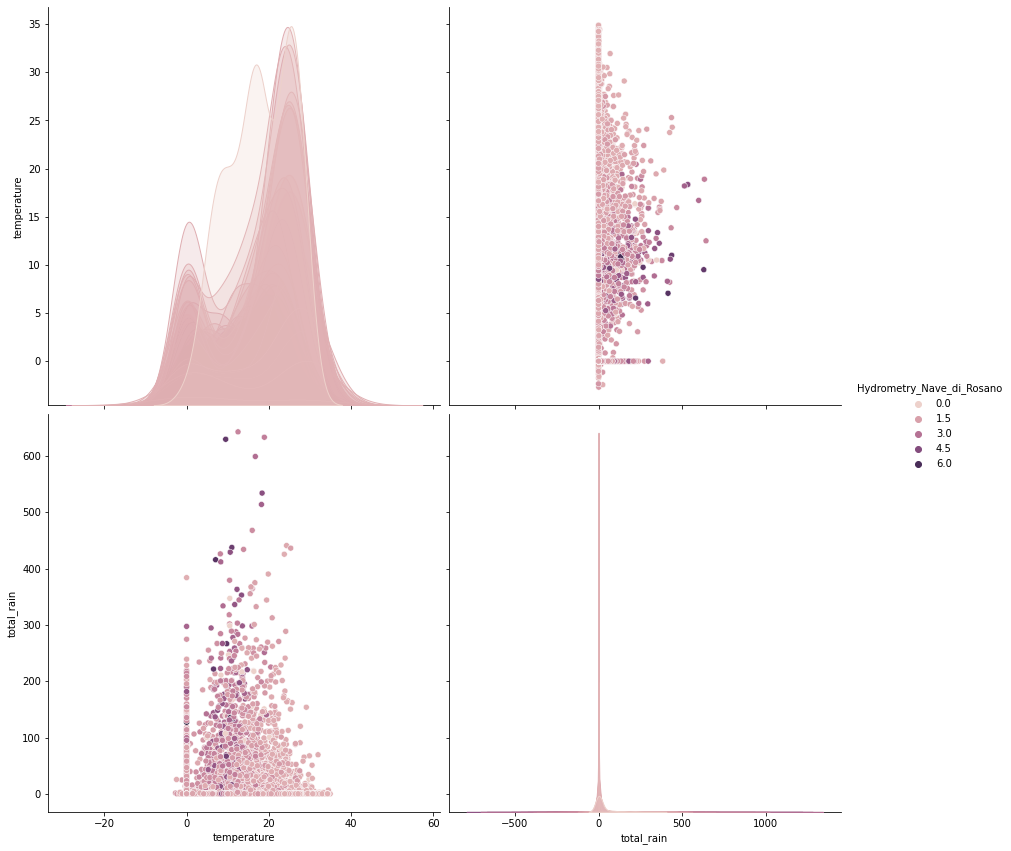

In [ ]:
sns.pairplot(combined.iloc[:, 1:], hue='Hydrometry_Nave_di_Rosano', height=6)

In [ ]:
combined.describe()
#print('total rain {}'.format(combined['total_rain'].describe()))

,temperature,Hydrometry_Nave_di_Rosano,total_rain
count,6026.000000,6026.000000,6026.000000
mean,13.556248,1.452147,23.136143
std,9.290447,0.649966,55.258946
min,-2.700000,0.000000,0.000000
25%,6.150000,1.080000,0.000000
50%,13.750000,1.280000,0.400000
75%,21.100000,1.670000,17.000000
max,34.900000,6.750000,643.000000


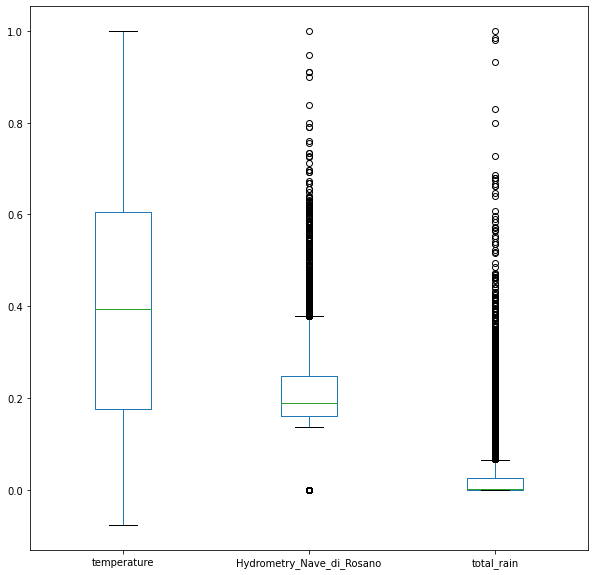

In [ ]:
combined['temperature'] = combined['temperature']/combined['temperature'].max()
combined['total_rain'] = combined['total_rain']/combined['total_rain'].max()
combined['Hydrometry_Nave_di_Rosano'] = combined['Hydrometry_Nave_di_Rosano']/combined['Hydrometry_Nave_di_Rosano'].max()
combined.plot(x='Date', kind='box', figsize=(10,10))

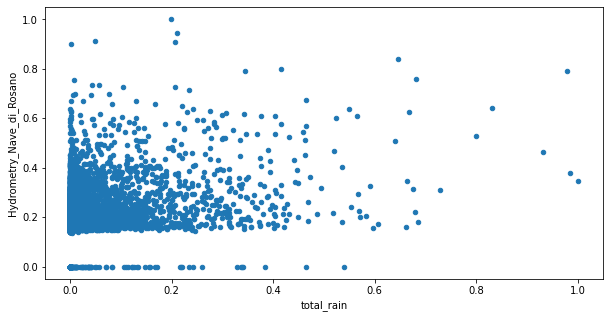

In [ ]:
combined.plot(x='total_rain', y='Hydrometry_Nave_di_Rosano', kind='scatter', figsize=(10,5))

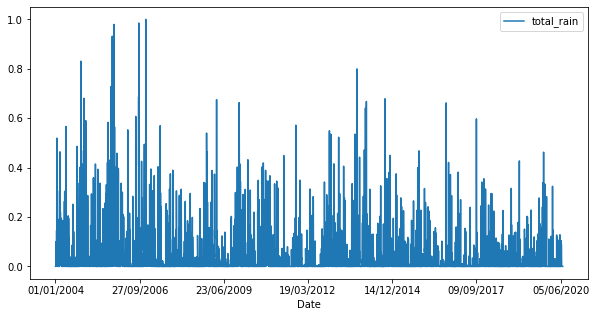

In [ ]:
combined.plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

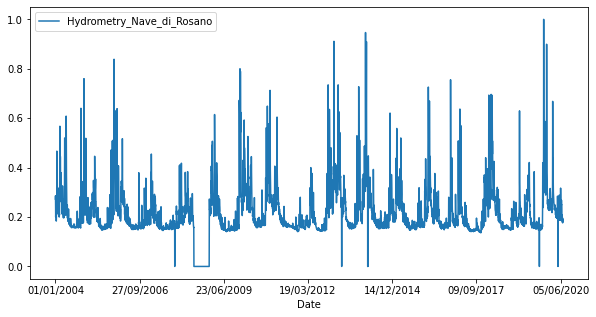

In [ ]:
combined.plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))

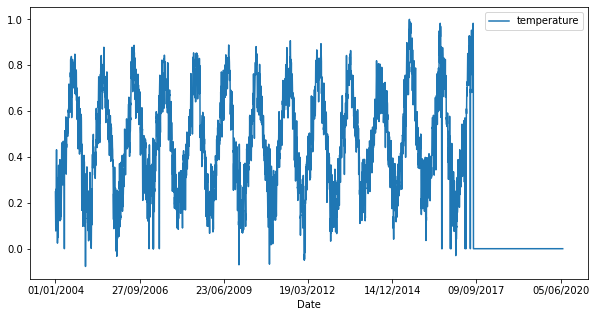

In [ ]:
combined.plot(x='Date', y='temperature', kind='line', figsize=(10,5))

In [ ]:
combined.tail(1063)
#as evidenced from graph and the snippet of dataframe below, post 2017 there are no recordings for temperature

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain,avg_hydro
7154,03/08/2017,0.776504,0.140741,0.0,<bound method Series.apply of 2191 0.272593...
7155,04/08/2017,0.000000,0.140741,0.0,<bound method Series.apply of 2191 0.272593...
7156,05/08/2017,0.000000,0.143704,0.0,<bound method Series.apply of 2191 0.272593...
7157,06/08/2017,0.000000,0.145185,0.0,<bound method Series.apply of 2191 0.272593...
7158,07/08/2017,0.000000,0.146667,0.0,<bound method Series.apply of 2191 0.272593...
...,...,...,...,...,...
8212,26/06/2020,0.000000,0.198519,0.0,<bound method Series.apply of 2191 0.272593...
8213,27/06/2020,0.000000,0.179259,0.0,<bound method Series.apply of 2191 0.272593...
8214,28/06/2020,0.000000,0.192593,0.0,<bound method Series.apply of 2191 0.272593...
8215,29/06/2020,0.000000,0.176296,0.0,<bound method Series.apply of 2191 0.272593...


In [ ]:
import statsmodels.api as sm
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


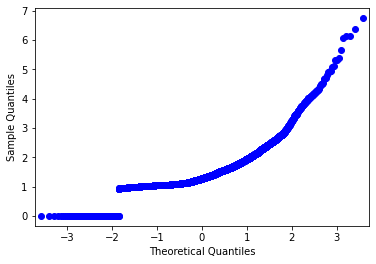

In [ ]:
sm.qqplot(data['Hydrometry_Nave_di_Rosano'])
pylab.show()

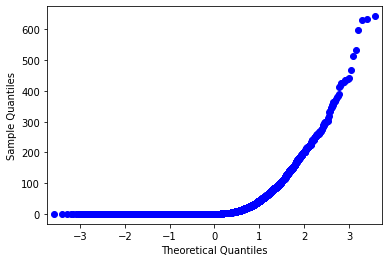

In [ ]:
sm.qqplot(data['total_rain'])
pylab.show()

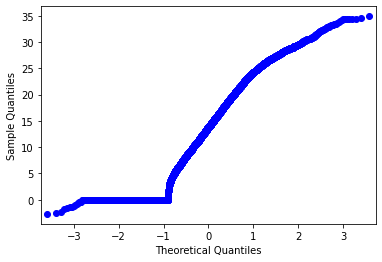

In [ ]:
sm.qqplot(data['temperature'])
pylab.show()

modelling
1. normalised data in range [0,1]. Inclusive.
2. log transformed data
3. original range

stationarity test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_hydro=adfuller(combined['Hydrometry_Nave_di_Rosano'])

In [ ]:
for i in test_hydro:
  print(i)
#since p value is 3.255, null hypothesis cannot be rejected
#lag is 20

-7.144705626248377
3.2554237077870235e-10
20
6005
{'1%': -3.4314394417219014, '5%': -2.8620214331706033, '10%': -2.5670262644091344}
1902.144000665252


#RIVER - Using non - nan values

##EDA

In [27]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [28]:
river = river.dropna().reset_index()

In [8]:
river.describe()

,index,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.00000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,2830.576803,2.867555,2.377429,2.362853,3.097806,2.255486,3.035737,2.54953,3.431818,2.090752,2.081975,2.428213,2.105956,2.519592,3.842947,16.047688,1.490282
std,369.675465,7.404714,6.458453,6.193672,8.201614,5.890147,8.537043,6.51870,8.960505,5.888406,6.335634,7.245808,6.391857,7.123253,9.614272,7.255555,0.557755
min,2191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.980000
25%,2510.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000,1.090000
50%,2830.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,1.335000
75%,3149.250000,0.800000,0.400000,0.800000,1.400000,0.800000,1.000000,1.00000,2.200000,0.400000,0.400000,0.650000,0.400000,0.800000,2.400000,21.900000,1.660000
max,3473.000000,56.000000,54.600000,53.800000,108.600000,50.400000,95.000000,63.00000,114.400000,56.600000,75.000000,123.200000,95.600000,77.400000,103.600000,30.950000,5.660000


Text(0.5, 1.0, 'Correlation among the variables')

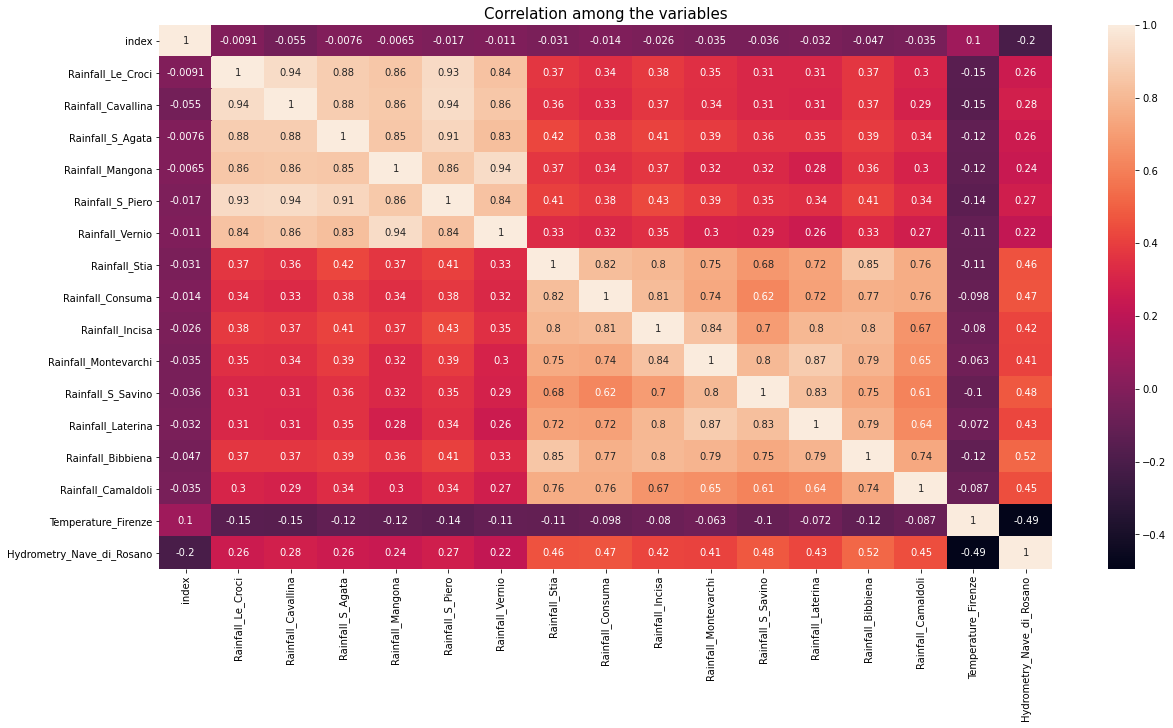

In [ ]:
correlation = river.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

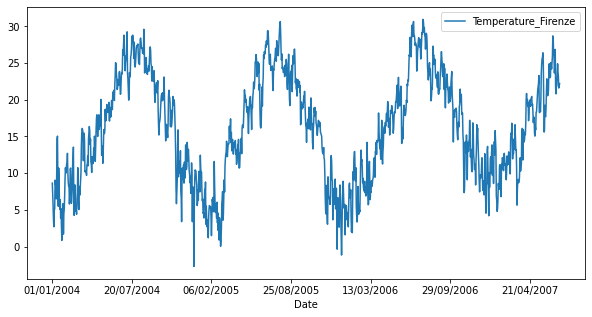

In [ ]:
river.plot(x='Date', y='Temperature_Firenze', kind='line', figsize=(10,5))

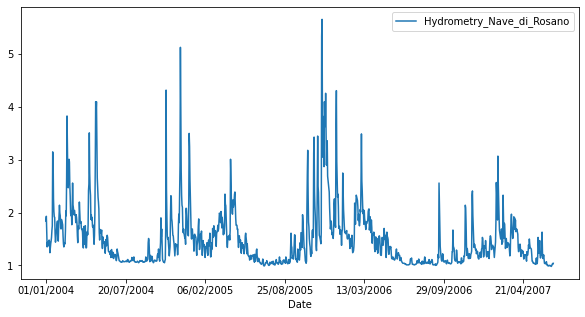

In [ ]:
river.plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))

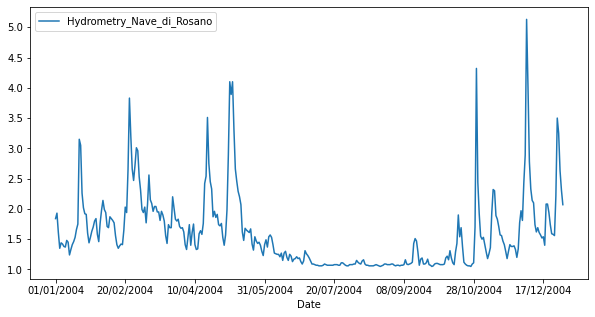

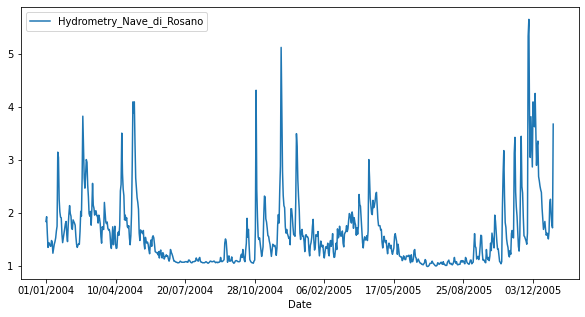

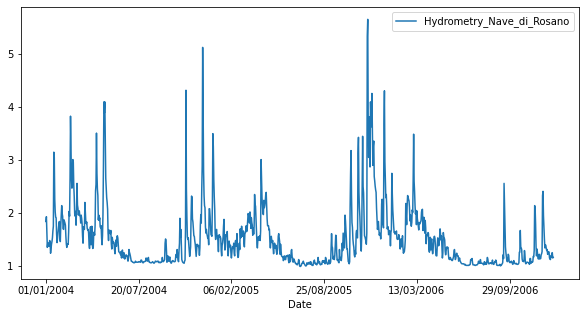

In [ ]:
river[0:365].plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))
river[0:730].plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))
river[0:1095].plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))

In [29]:
river['total_rain'] = river.iloc[:,2:16].sum(axis=1)

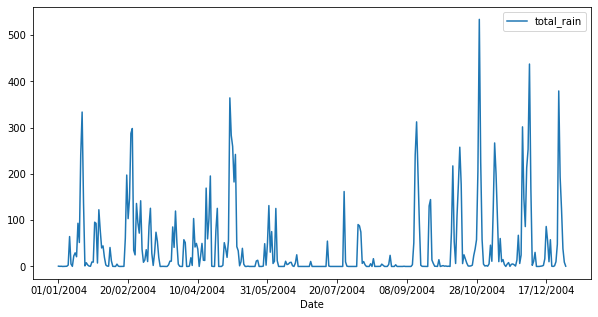

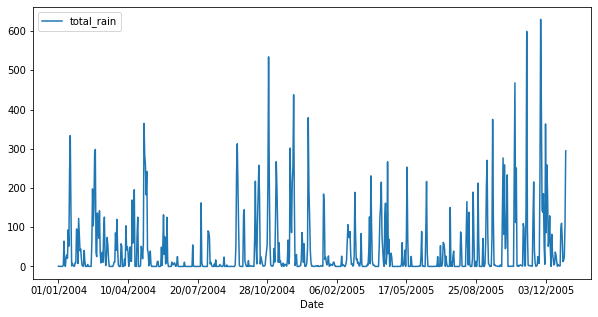

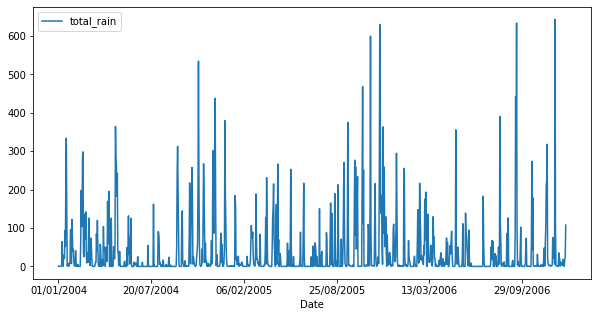

In [ ]:
river[0:365].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
river[0:730].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
river[0:1095].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

In [ ]:
'''since p value < 0.05, null hypthesis can be rejected. Data is stationary'''

In [ ]:
# Determine how long the sequence  of features has to be for lstm

In [ ]:
#print(river.total_rain.quantile(0.95)) - 200.299
river['total_rain_0.95'] = river['total_rain']/river.total_rain.quantile(0.95)
river['total_rain_0.75'] = river['total_rain']/river.total_rain.quantile(0.75)

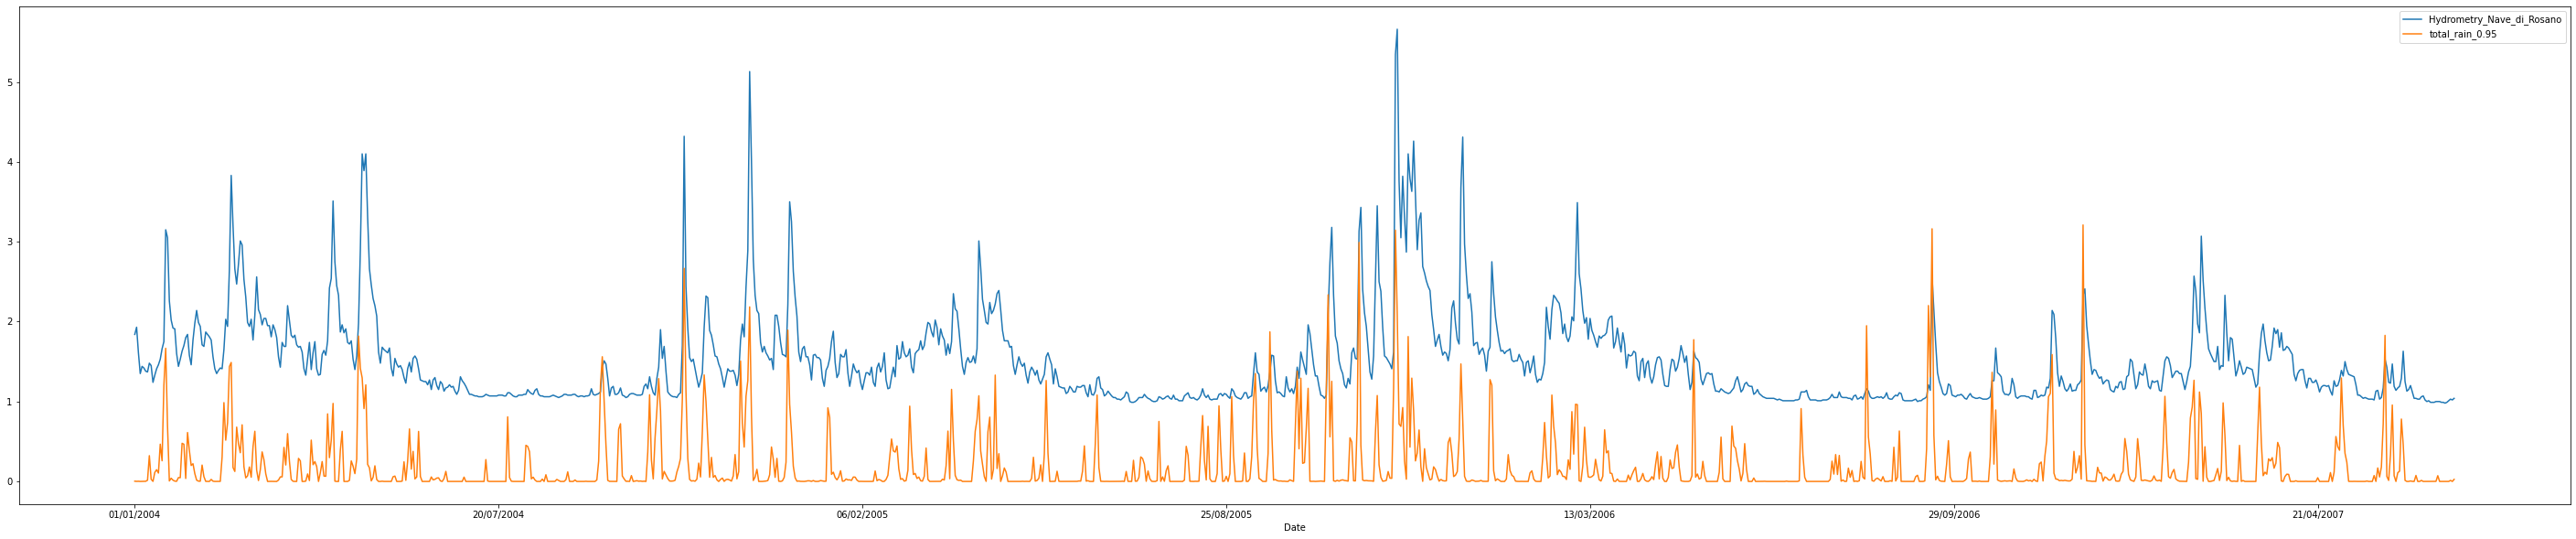

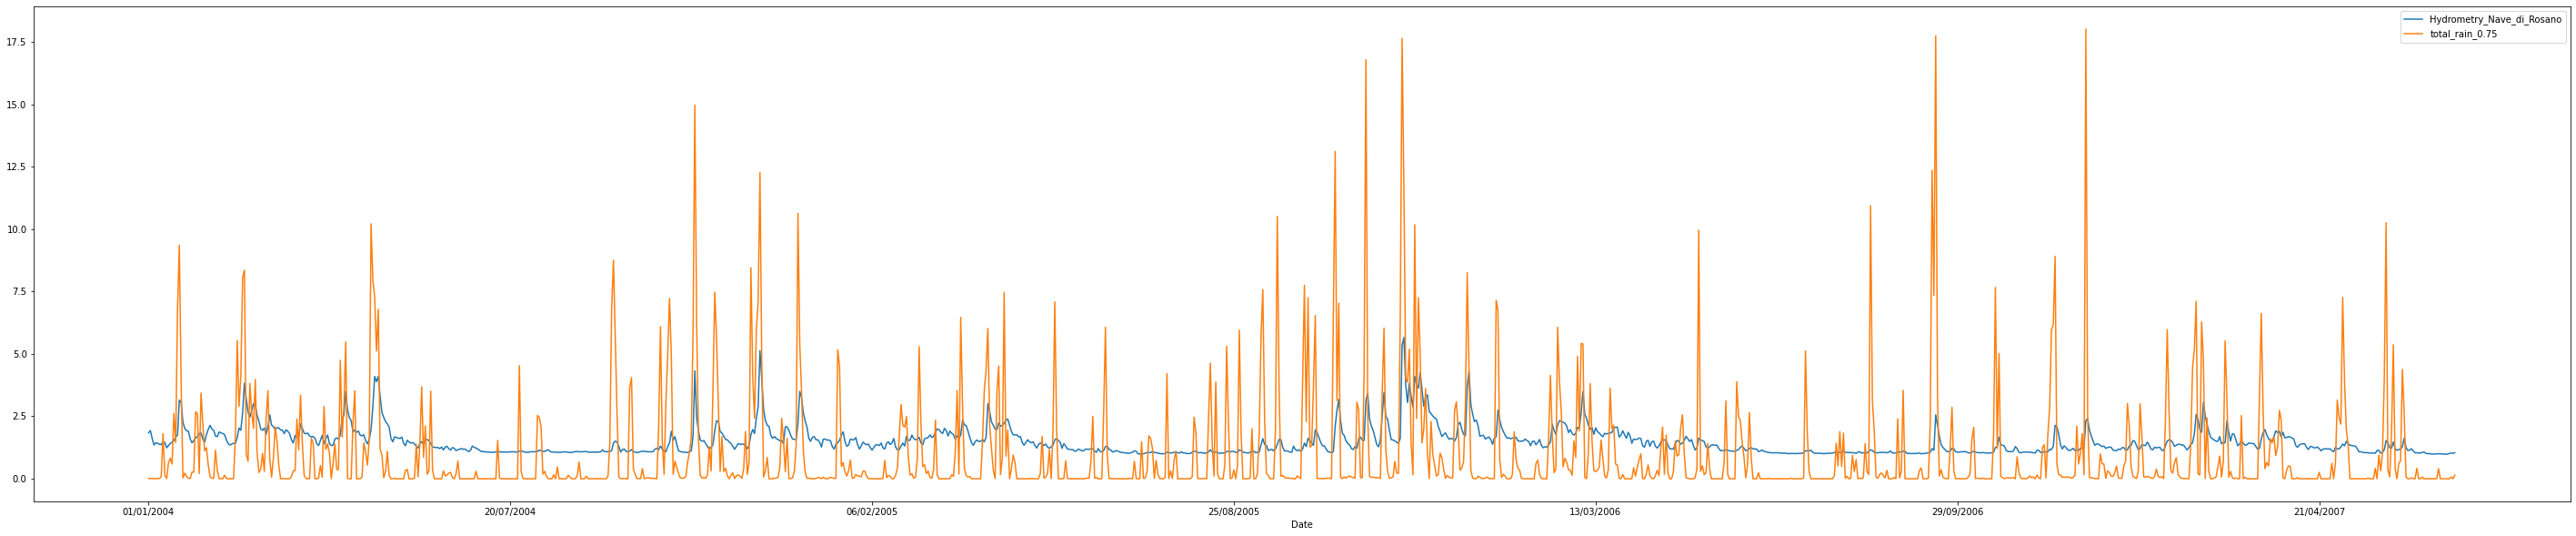

In [ ]:
for i in ['total_rain_0.95', 'total_rain_0.75']:
  river.plot(x='Date', y=['Hydrometry_Nave_di_Rosano', i]
           , kind='line', figsize=(50,10))

In [ ]:
river['hydro'] = river['Hydrometry_Nave_di_Rosano']
river.hydro = river.hydro/river.hydro.max()

In [ ]:
river.total_rain = river.total_rain/643.0

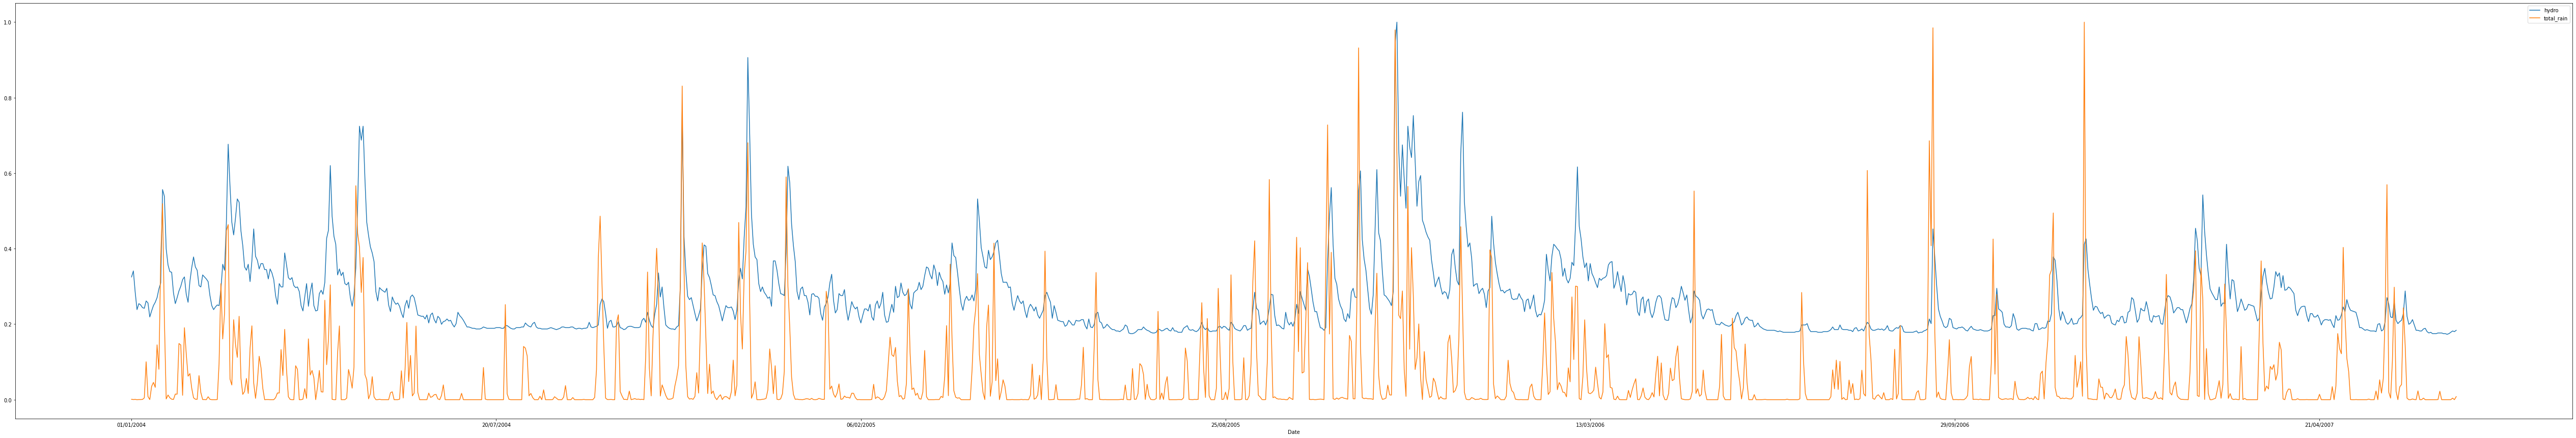

In [ ]:
river.plot(x='Date', y=['hydro', 'total_rain'], kind='line', figsize=(90,15)) 

## LSTM
day,week,fortnight,month,lstm

In [168]:
river.describe()

,index,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,month
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.00000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,2830.576803,2.867555,2.377429,2.362853,3.097806,2.255486,3.035737,2.54953,3.431818,2.090752,2.081975,2.428213,2.105956,2.519592,3.842947,16.047688,1.490282,37.047649,6.108150
std,369.675465,7.404714,6.458453,6.193672,8.201614,5.890147,8.537043,6.51870,8.960505,5.888406,6.335634,7.245808,6.391857,7.123253,9.614272,7.255555,0.557755,77.184116,3.417036
min,2191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.980000,0.000000,1.000000
25%,2510.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.250000,1.090000,0.000000,3.000000
50%,2830.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,1.335000,2.600000,6.000000
75%,3149.250000,0.800000,0.400000,0.800000,1.400000,0.800000,1.000000,1.00000,2.200000,0.400000,0.400000,0.650000,0.400000,0.800000,2.400000,21.900000,1.660000,35.700000,9.000000
max,3473.000000,56.000000,54.600000,53.800000,108.600000,50.400000,95.000000,63.00000,114.400000,56.600000,75.000000,123.200000,95.600000,77.400000,103.600000,30.950000,5.660000,643.000000,12.000000


In [ ]:
river.drop(river.columns[[-4,-3,-2,-1]], axis = 1, inplace=True)
river.columns

Index(['index', 'Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina',
       'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero',
       'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma',
       'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino',
       'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli',
       'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano'],
      dtype='object')

###Non regularised total rain

In [171]:
for i in ['Hydrometry_Nave_di_Rosano', 'total_rain', 'Temperature_Firenze']:
  test = adfuller(river[i])
  p_value = test[1]
  if p_value > 0.05:
    print("due to p value being > 0.05, {}'s time series will be made stationary".format(i))

due to p value being > 0.05, Temperature_Firenze's time series will be made stationary


In [199]:
adfuller(river['Temperature_Firenze'].diff().dropna())

(-13.194634686085132,
 1.1258603530626868e-24,
 10,
 1264,
 {'1%': -3.4355340425478706,
  '10%': -2.5679888467643406,
  '5%': -2.863829299639741},
 5093.55683471047)

In [203]:
river['stationary_temp'] = river['Temperature_Firenze'].diff().fillna(method = 'backfill')
river.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,0,1,2,3,4,5,6,7,8,9,10,11,stationary_temp
0,2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.55
1,2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.55
2,2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.60
3,2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.95
4,2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.85


In [44]:
river['month'] = pd.to_datetime(river['Date'], dayfirst=True).dt.month
river.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,month
0,2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6,1
1,2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2,1
2,2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4,1
3,2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0,1
4,2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2,1


In [187]:
encoder = OneHotEncoder()
encoder_dataframe = pd.DataFrame(encoder.fit_transform(river[['month']]).toarray())

In [194]:
river = river.join(encoder_dataframe)
river.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,0,1,2,3,4,5,6,7,8,9,10,11
0,2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
#river['month_encode'] = river['month'].astype('category')
#river['month_encode'] = river['month_encode'].cat.codes
river.drop(columns='month_encode', axis=1)

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,month
0,2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6,1
1,2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2,1
2,2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4,1
3,2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0,1
4,2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,3469,02/07/2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.80,0.99,0.0,7
1272,3470,03/07/2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.15,1.01,0.0,7
1273,3471,04/07/2007,0.0,0.0,0.8,1.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.60,1.03,2.6,7
1274,3472,05/07/2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.90,1.02,0.0,7


In [173]:
river['month']

0       1
1       1
2       1
3       1
4       1
       ..
1271    7
1272    7
1273    7
1274    7
1275    7
Name: month, Length: 1276, dtype: int64

In [57]:
shift = river.copy()
shift.head()

,index,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,total_rain,month
0,2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6,1
1,2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2,1
2,2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4,1
3,2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0,1
4,2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2,1


In [61]:
shift

Index(['Temperature_Firenze', 'Hydrometry_Nave_di_Rosano', 'total_rain',
       'month'],
      dtype='object')

---------------------------------------

RE-WRITE MODEL to account for changes - one hot encoding months, stationary temperature.

-----------------------------------------------

In [60]:
scaler = MinMaxScaler()
shift.iloc[:,-4:-1] = scaler.fit_transform(shift.iloc[:,-4:-1])

In [125]:
features = shift.iloc[:,-4:].copy().to_numpy()
target = shift['Hydrometry_Nave_di_Rosano'].copy().to_numpy()

In [139]:
x, xtest, y, ytest = train_test_split(features, target, test_size=0.3,
                                                shuffle=False)
xtrain, xval, ytrain, yval = train_test_split(features, target, test_size=0.2,
                                                shuffle=False)

In [111]:
shift['Hydrometry_Nave_di_Rosano'][6]

0.08547008547008547

In [140]:
train_generator = TimeseriesGenerator(xtrain, ytrain, length=6, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(xval, yval, length=6, sampling_rate=1, batch_size=32)
test_generator = TimeseriesGenerator(xtest, ytest, length=6, sampling_rate=1, batch_size=32)

In [145]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(6, 4), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 6, 64)             17664     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 6, 64)             0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 6, 64)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 6, 1)              65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min'
)

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()]
)

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=val_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

In [162]:
model.metrics_names

['loss', 'mean_absolute_error']

In [147]:
model.evaluate(test_generator, verbose=0)

[0.005314948968589306, 0.054702028632164]

In [134]:
predictions = model.predict(test_generator)

In [136]:
scaling, 

383

# LAKE - non nan EDA

In [ ]:
ls

Aquifer_Auser.csv          kaggle.json
Aquifer_Doganella.csv      Lake_Bilancino.csv
Aquifer_Luco.csv           River_Arno.csv
Aquifer_Petrignano.csv     sample_data/
datasets_description.ods   Water_Spring_Amiata.csv
datasets_description.xlsx  Water_Spring_Lupa.csv
drive/                     Water_Spring_Madonna_di_Canneto.csv


In [ ]:
lake = pd.read_csv('Lake_Bilancino.csv')

In [ ]:
#info = pd.read_excel('datasets_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[6])
info['Datasets_Feature_Description'][55:62]

Database                                         Lake_Bilancino 
Description    Information about Bilancino Lake. It is an art...
Output                                   Lake_Level, \nFlow_Rate
Name: 6, dtype: object


,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
55,BILANCINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
57,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
58,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero"
59,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Le_Croci
60,Flow_Rate,Real Number,"It indicates the lake's flow rate, expressed i...",NaN,NaN,NaN,NaN,NaN
61,Lake_Level,Real Number,"It indicates the river level, expressed in met...",NaN,NaN,NaN,NaN,NaN


In [ ]:
print(info['Datasets_Feature_Description']['Unnamed: 2'][58])
print(info['Datasets_Feature_Description']['Unnamed: 2'][59])
print(info['Datasets_Feature_Description']['Unnamed: 2'][60])
print(info['Datasets_Feature_Description']['Unnamed: 2'][61])

It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the lake's flow rate, expressed in cubic meters per seconds (mc/s)
It indicates the river level, expressed in meters (m)


In [ ]:
lake.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [ ]:
lake = lake.dropna().reset_index()

In [ ]:
print(lake.shape)

(6025, 10)


In [ ]:
lake.head()

,index,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
1,579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
2,580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
3,581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
4,582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [ ]:
lake.describe()

,index,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,3590.000000,2.471635,3.341212,2.670440,2.675187,3.130390,14.530141,249.553472,2.778204
std,1739.412018,6.650488,8.903769,7.167178,7.656404,8.025686,6.944029,2.183334,4.131176
min,578.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.450000
25%,2084.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,247.930000,0.600000
50%,3590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.240000,1.500000
75%,5096.000000,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.370000,3.000000
max,6602.000000,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


Text(0.5, 1.0, 'Correlation among the variables')

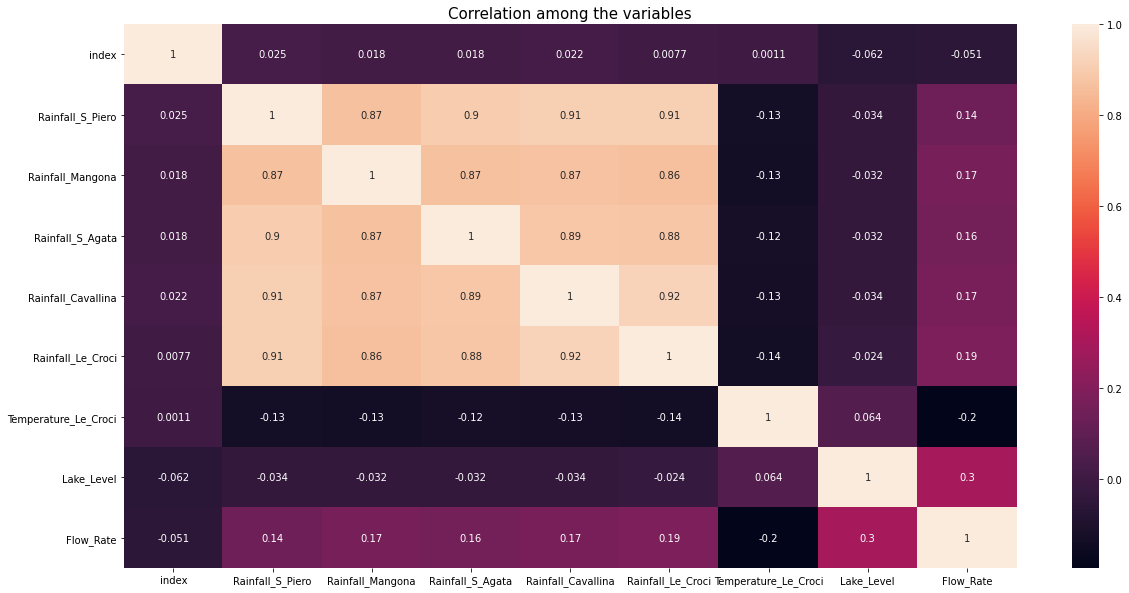

In [ ]:
correlation = lake.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

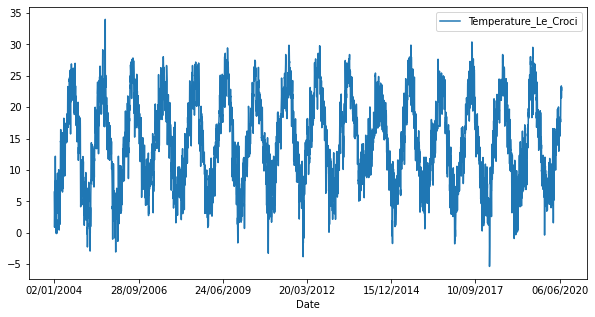

In [ ]:
lake.plot(x='Date', y='Temperature_Le_Croci', kind='line', figsize=(10,5))

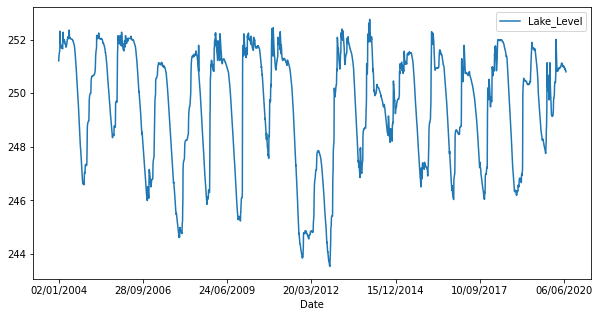

In [ ]:
lake.plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

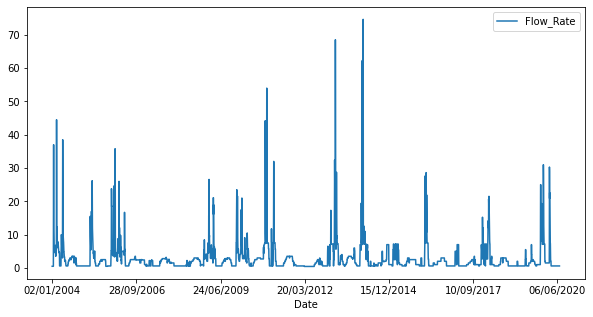

In [ ]:
lake.plot(x='Date', y='Flow_Rate', kind='line', figsize=(10,5))

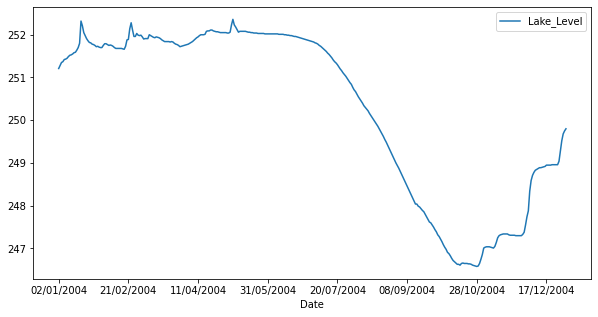

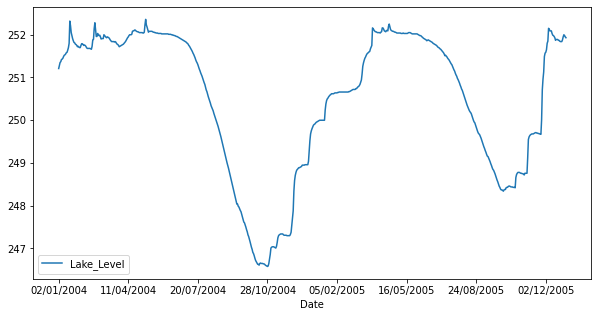

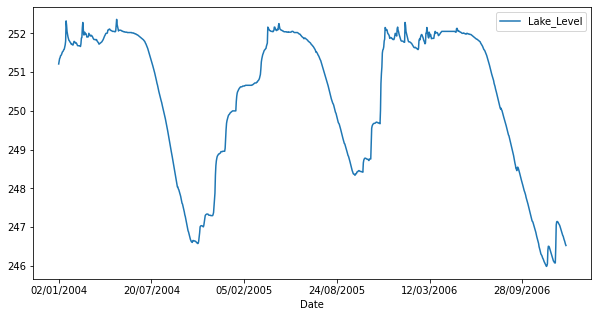

In [ ]:
lake[0:365].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='Lake_Level', kind='line', figsize=(10,5))

In [ ]:
test_hydro=adfuller(lake['Lake_Level'])
for i in test_hydro:
  print(i)
#non stationary

-5.699711266094059
7.726366762783402e-07
27
5997
{'1%': -3.4314408956603097, '5%': -2.8620220755599486, '10%': -2.5670266063699962}
-11659.833479862486


In [ ]:
lake['total_rain'] = lake.iloc[:,2:7].sum(axis=1)

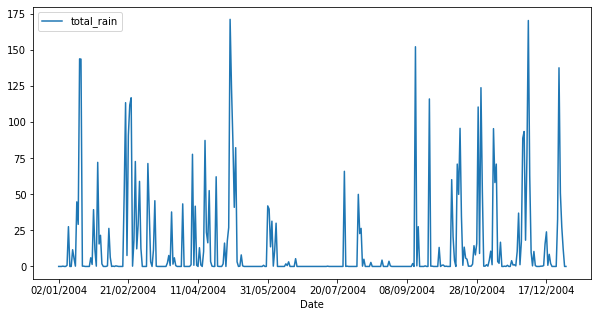

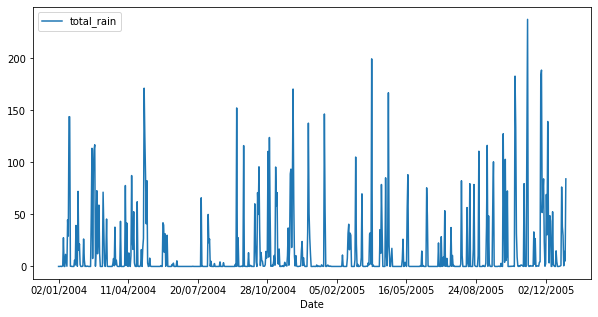

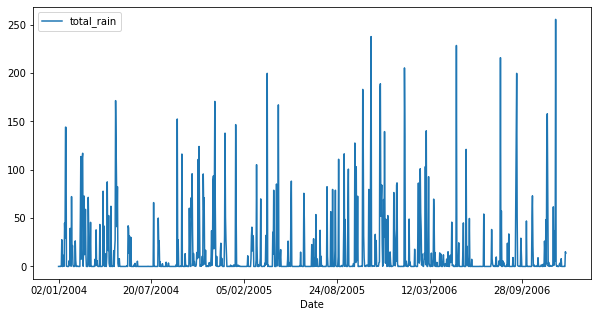

In [ ]:
lake[0:365].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:730].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))
lake[0:1095].plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

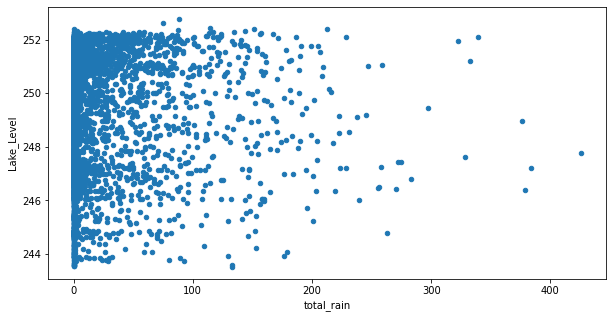

In [ ]:
lake.plot(x='total_rain', y='Lake_Level', kind='scatter', figsize=(10,5))

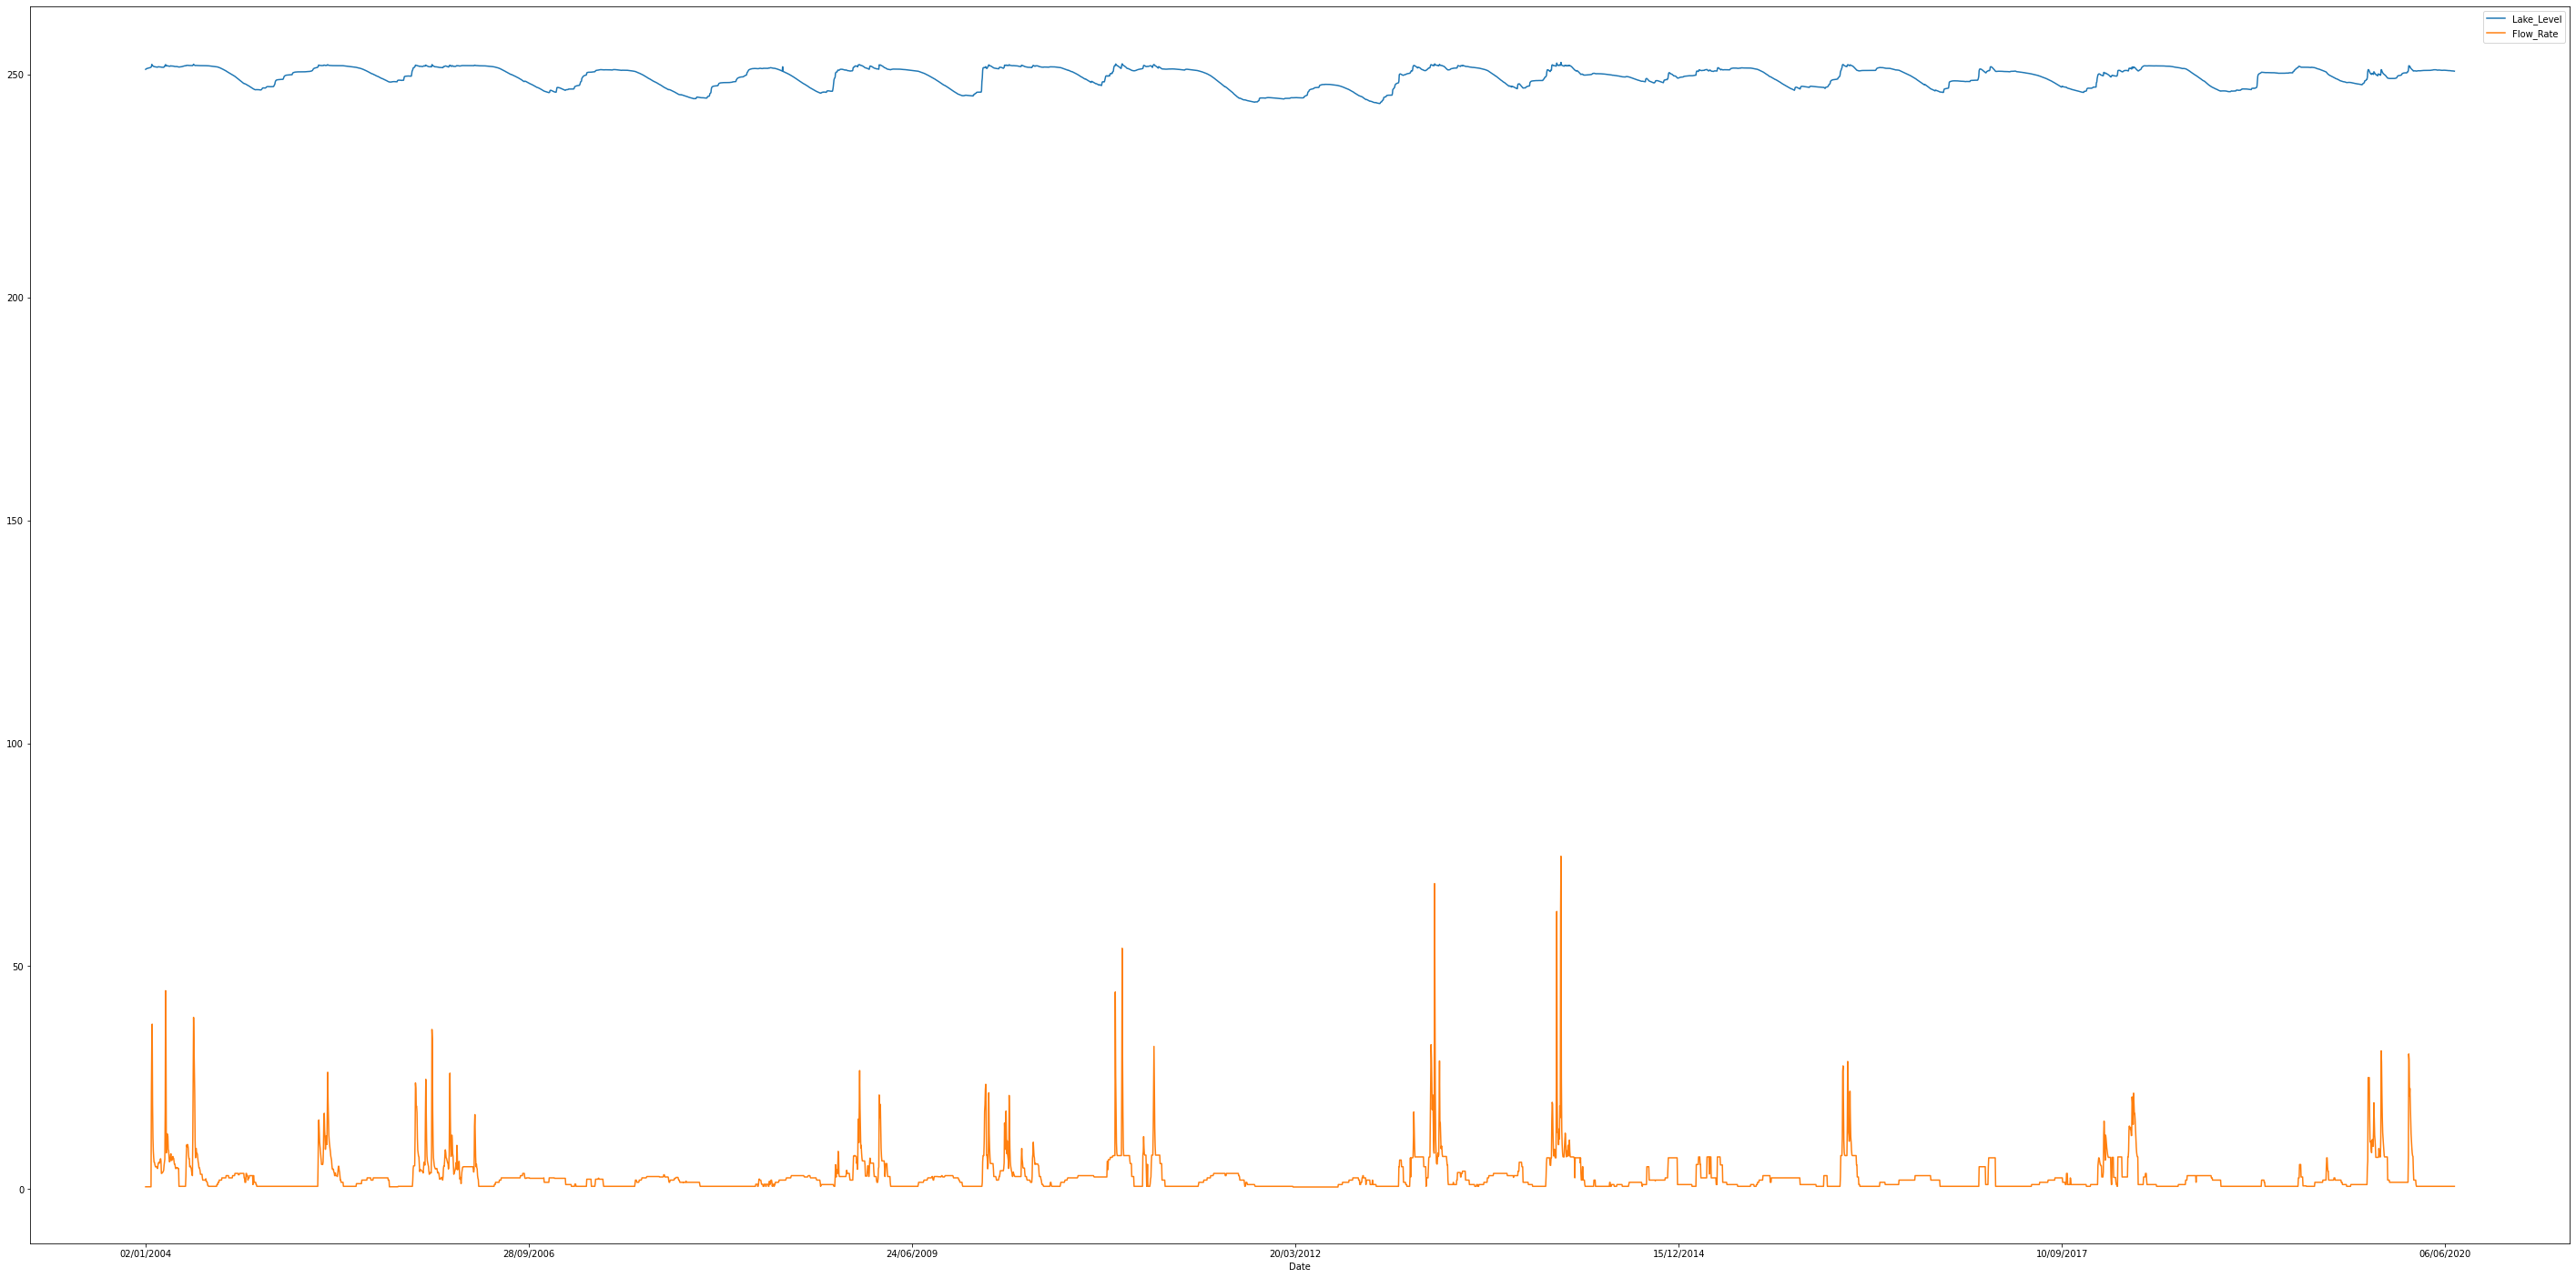

In [ ]:
lake.plot(x='Date', y=['Lake_Level', 'Flow_Rate'], kind='line', figsize=(50,25))

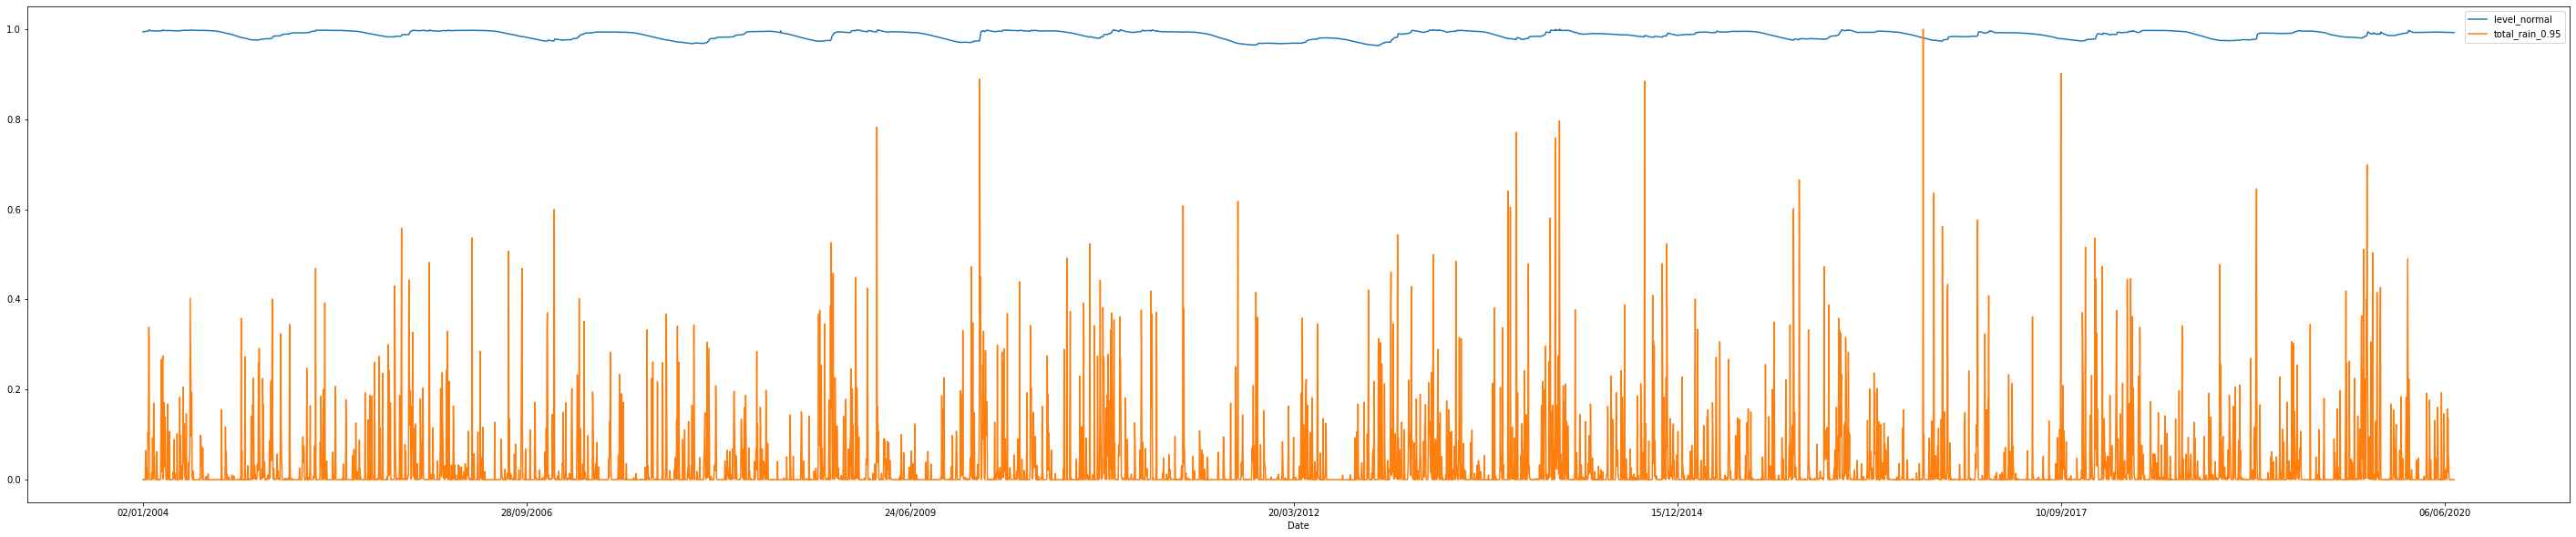

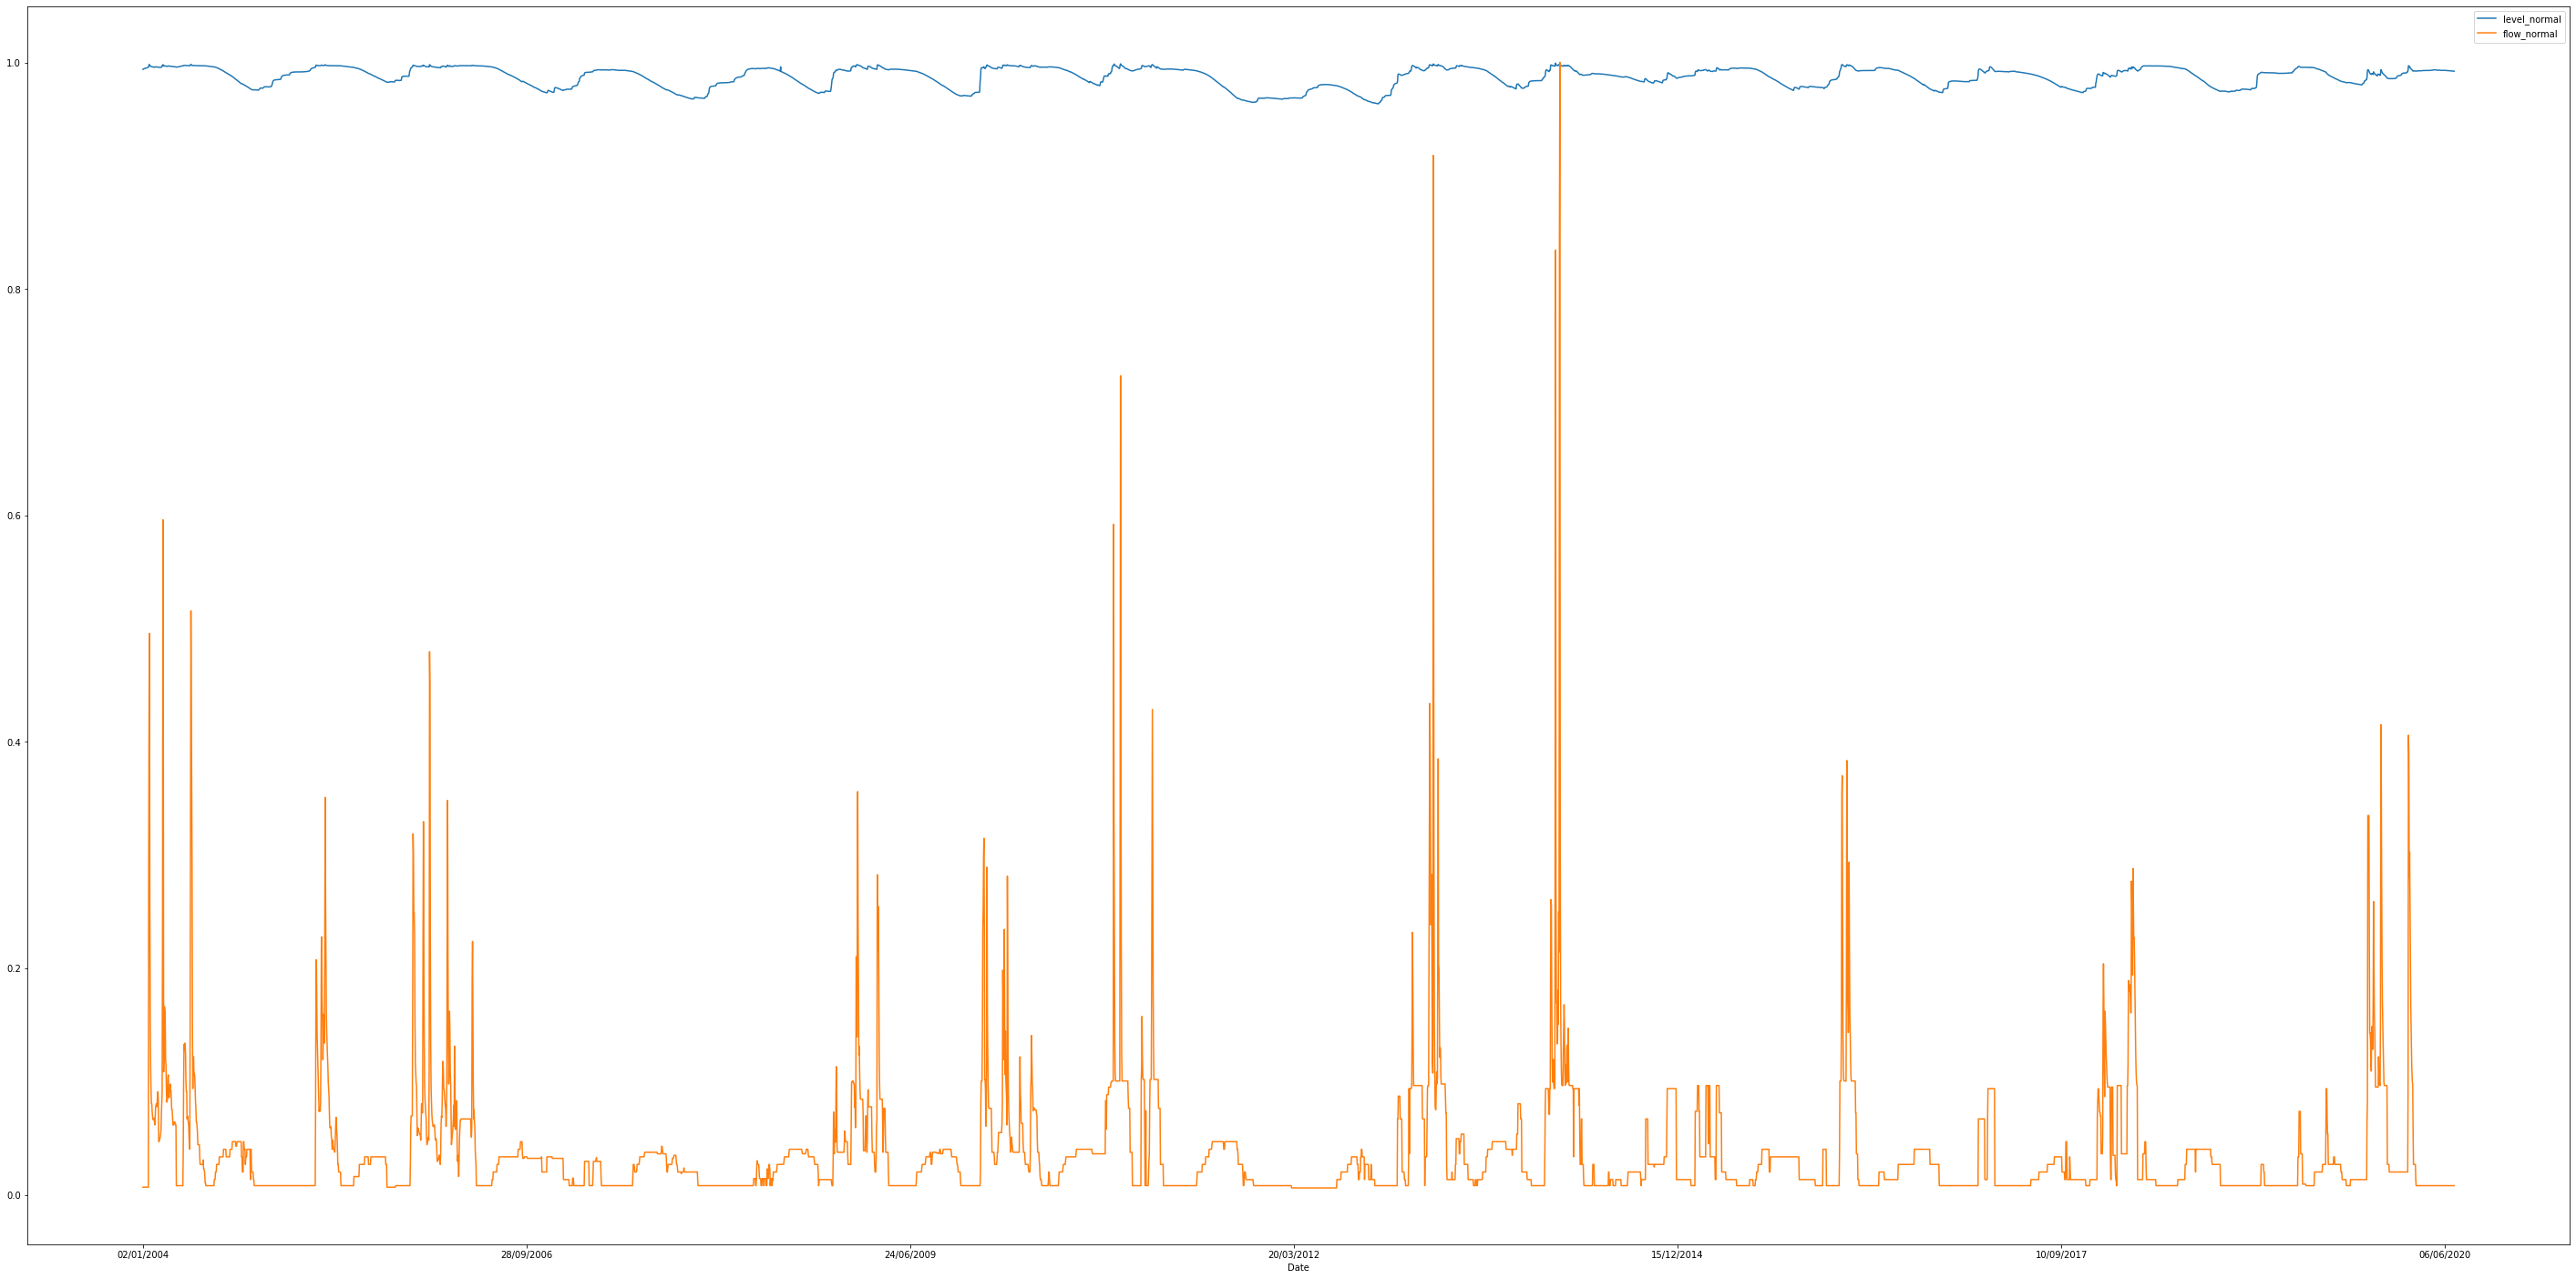

In [ ]:
lake['total_rain_0.95'] = lake['total_rain']/lake.total_rain.quantile(1)
#lake['total_rain_0.75'] = lake['total_rain']/lake.total_rain.quantile(0.75)
lake['level_normal'] = lake['Lake_Level']/lake.Lake_Level.max()
lake['flow_normal'] = lake['Flow_Rate']/lake.Flow_Rate.max()
for i in ['total_rain_0.95']:
  lake.plot(x='Date', y=['level_normal', i]
           , kind='line', figsize=(50,10))
lake.plot(x='Date', y=['level_normal', 'flow_normal'], kind='line', figsize=(50,25))

#SPRING - non nan EDA

In [ ]:
lupa = pd.read_csv('Water_Spring_Lupa.csv')

In [ ]:
madona = pd.read_csv('/content/Water_Spring_Madonna_di_Canneto.csv')

In [ ]:
amiata = pd.read_csv('/content/Water_Spring_Amiata.csv')

In [ ]:
for i in [lupa, madona, amiata]:
  print(i.columns)

Index(['Date', 'Rainfall_Terni', 'Flow_Rate_Lupa'], dtype='object')
Index(['Date', 'Rainfall_Settefrati', 'Temperature_Settefrati',
       'Flow_Rate_Madonna_di_Canneto'],
      dtype='object')
Index(['Date', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'],
      dtype='object')


#AQUIFER - non nan EDA

In [ ]:
auser = pd.read_csv('/content/Aquifer_Auser.csv')
doga =  pd.read_csv('/content/Aquifer_Doganella.csv')
luco =  pd.read_csv('/content/Aquifer_Luco.csv')
petri =  pd.read_csv('/content/Aquifer_Petrignano.csv')

In [ ]:
for i in [auser, doga, luco, petri]:
  print(i.columns)

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')
Index(['Date', 'Rainfall_Monteporzio', 'Rainfall_Velletri',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Dept